In [2]:
# %reset
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset
import matplotlib as mpl
import pandas as pd
import scipy.stats as stats
# from sklearn import linear_model #不需要
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.io.shapereader import Reader, natural_earth
import matplotlib.path as mpath
import matplotlib.ticker as mticker
origin = 'lower'


In [3]:

from cdo import *
cdo=Cdo()
f=cdo.selname("tsurf", input = "../pyncl/self/Eoi400-Eoi280_echam5_last100year_catted_ts_ymonmean_r360x180_ANN.nc",returnCdf = True)
t = f.variables["tsurf"]
T=t[0,:,:]
T.shape
lon = f.variables["lon"]
lon.shape
lat = f.variables["lat"]

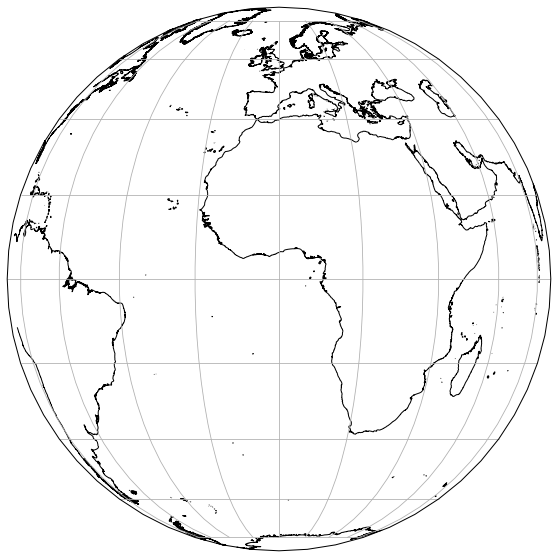

In [20]:
fig=plt.figure(figsize=(10,10))
ax= plt.axes(projection = ccrs.Orthographic())
ax.coastlines(resolution='10m')
ax.gridlines()

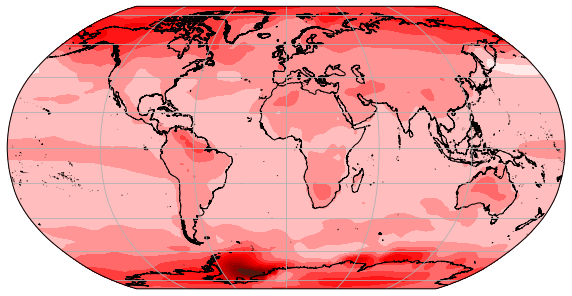

In [22]:
from cdo import *
cdo=Cdo()
f=cdo.selname("tsurf", input = "../pyncl/self/Eoi400-Eoi280_echam5_last100year_catted_ts_ymonmean_r360x180_ANN.nc",returnCdf = True)
t = f.variables["tsurf"]
T=t[0,:,:]
T.shape
LON = f.variables["lon"]
# LON.shape
LAT = f.variables["lat"]
fig=plt.figure(figsize=(10,10))
f1_ax1 = plt.axes(projection = ccrs.Robinson()) #Robinson LambertCylindrical
f1_ax1.coastlines(resolution='10m')
f1_ax1.gridlines()
# box=[-180, 180, -60, -90]
# xstep,ystep=30,30
#     # Limit the map to -60 degrees latitude and below.
# f1_ax1.set_extent(box, crs=ccrs.PlateCarree())
# f1_ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))
# scale='50m'
# ##
# #land = cfeature.NaturalEarthFeature('physical', 'land', scale,edgecolor='face',facecolor=cfeature.COLORS['land'])
# #f1_ax1.add_feature(land, facecolor='0.95')
# f1_ax1.coastlines(scale)

# #×¢Òâ´Ë´¦Ìí¼ÓÁËprojection = ccrs.NorthPolarStereo()£¬Ö¸Ã÷¸ÃaxesÎª±±°ëÇò¼«µØÍ¶Ó°
# f1_ax1.gridlines()
# f1_ax1.ylocator=mticker.FixedLocator(np.arange(0,90,30))#ÊÖ¶¯ÉèÖÃxÖá¿Ì¶È
# f1_ax1.xlocator=mticker.FixedLocator(np.arange(-180,180,30))#ÊÖ¶¯ÉèÖÃxÖá¿Ì¶È
# #f1_ax1.set_extent(img_extent, ccrs.PlateCarree())

# #######ÒÔÏÂÎªÍø¸ñÏßµÄ²ÎÊý######
# theta = np.linspace(0, 2*np.pi, 100)
# center, radius = [0.5, 0.5], 0.5
# verts = np.vstack([np.sin(theta), np.cos(theta)]).T
# circle = mpath.Path(verts * radius + center)
# ##############################
# f1_ax1.set_boundary(circle, transform=f1_ax1.transAxes)
# ticks=np.arange(0,210,60)
# etick=['0']+['%d$^\circ$E'%tick for tick in ticks if (tick !=0) & (tick!=180)]+['180']
# wtick=['%d$^\circ$W'%tick for tick in ticks if (tick !=0) & (tick!=180)]
# labels=etick+wtick


from cartopy.util import add_cyclic_point
lon=[]
lon[:] = [x  for x in LON]
lon.append(360.0)
lat=[]
lat[:] = [x  for x in LAT]
# print(lon[:])
T = add_cyclic_point(T)

X,Y = np.meshgrid(lon,lat)
# xticks=[-0.8,58,120,182.9,-62,-114]
# yticks=[-57]+[-57]+[-55]+[-55]+[-48]+[-45]
# xticks=[-0.8,58,120,182.9,-64,-114]
# # yticks=[-57]+[-57]+[-55]+[-55]+[-48]+[-45]
# yticks=[-60]+[-60]+[-59]+[-57.5]+[-53]+[-50]

#±ê×¢¾­Î³¶È   
#ax.text(0.01,0.23,'60$^\circ$W',transform=ax.transAxes,rotation=25)
#ax.text(-63,50,'60$^\circ$W',transform=ccrs.Geodetic(),rotation=25)

# for xtick,ytick,label in zip(xticks,yticks,labels):
#     f1_ax1.text(xtick,ytick,label,transform=ccrs.Geodetic(),fontsize=20)
levels=np.arange(-12,13,1)
CS=plt.contourf(X,Y,T,cmap='seismic',levels=levels,origin=origin,extend='both',transform=ccrs.PlateCarree()) 
# CS.cmap.set_under('#151578')
# CS.cmap.set_over('#53170F')
# #cbar=plt.colorbar()   'vertical'
# cbar=fig.colorbar(CS,orientation='horizontal',aspect=35, shrink=0.8,fraction=0.08, pad=0.1)
# cbar.ax.tick_params(labelsize=15)
# cbar.set_ticks([0,10,20,30,40,50,60,70,80,90])
# cbar.set_ticklabels(('0','10','20','30','40','50','60','70','80','90'))
# # '''
# plt.text(-130,-45,"<%s> %s ustrw_vstrw" %(model,yue),weight='light',color='black',fontsize=15,transform=ccrs.PlateCarree())
# #plt.title("*1e-7",loc='right',fontsize=20)
# import os
# os.makedirs(r"../pic/python/%s" % model,exist_ok=True)
# plt.savefig(r"../pic/python/%s/%s %s ustrw_vstrw jishe.png" %(8model,yue,model),bbox_inches='tight', dpi=150, pad_inches=-0.005)